# Ordinary Kriging

Referenced Code Notebook:
https://colab.research.google.com/drive/1mZDVJ-RioBc4QHHpe2HBNJrx8sJ4-1Lw#scrollTo=TBAAD0nX-7tT

Useful paper on OK:   
https://iopscience.iop.org/article/10.1088/1742-6596/1434/1/012025/pdf

PyKrige:
https://geostat-framework.readthedocs.io/projects/pykrige/en/latest/examples/08_krige_cv.html#sphx-glr-examples-08-krige-cv-py
    
https://github.com/GeoStat-Framework/PyKrige/blob/main/src/pykrige/ok.py

https://github.com/GeoStat-Framework/PyKrige/blob/main/src/pykrige/variogram_models.py


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [4]:
crimes_df = pd.read_csv("crimes_processed.csv")
meuse_df = pd.read_csv("meuse_processed.csv")

In [5]:
meuse_df

,x,y,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,landuse,dist.m
0,181072,333611,11.7,85,299,1022,7.909,0.001358,13.6,1,1,1,Ah,50
1,181025,333558,8.6,81,277,1141,6.983,0.012224,14.0,1,1,1,Ah,30
2,181165,333537,6.5,68,199,640,7.800,0.103029,13.0,1,1,1,Ah,150
3,181298,333484,2.6,81,116,257,7.655,0.190094,8.0,1,2,0,Ga,270
4,181307,333330,2.8,48,117,269,7.480,0.277090,8.7,1,2,0,Ah,380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,179184,330182,0.8,20,49,166,8.128,0.423837,4.7,3,1,0,Am,540
151,179085,330292,3.1,39,173,496,8.577,0.423837,9.1,3,1,0,Ah,520
152,178875,330311,2.1,31,119,342,8.429,0.277090,6.5,3,1,0,Ah,350
153,179466,330381,0.8,21,51,162,9.406,0.358606,5.7,3,1,0,W,460


In [10]:
x = np.array(meuse_df['x'])
y = np.array(meuse_df['y'])
zinc = np.array(meuse_df['zinc'])

Text(0.5, 1.0, 'Measured Zinc Levels')

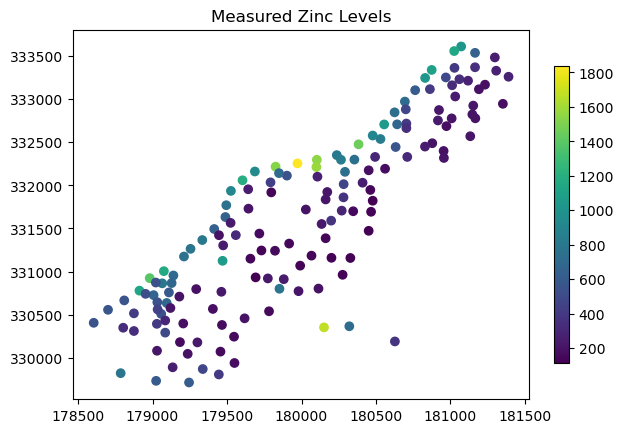

In [11]:
cax = plt.scatter(x, y, c=zinc)
cbar = plt.colorbar(cax, fraction=0.03)
plt.title('Measured Zinc Levels')

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'exponential' Variogram Model
Partial Sill: 100113.19810744449
Full Sill: 136584.63411320242
Range: 954.8407332703556
Nugget: 36471.436005757925 



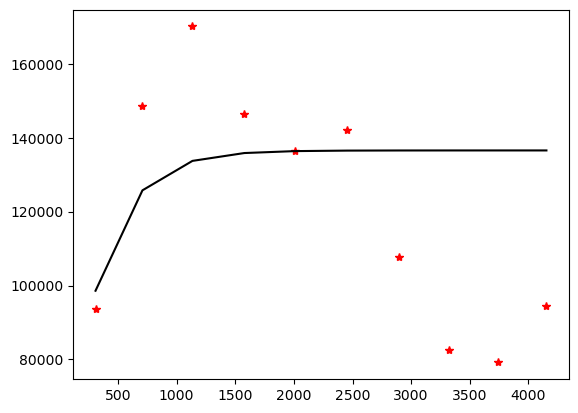

Calculating statistics on variogram model fit...


In [14]:
OK = OrdinaryKriging(
    x, 
    y, 
    zinc, 
    variogram_model='exponential',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)

In [ ]:
OK.variogram_model_parameters

In [ ]:
gridx = np.arange(-300, 300, 10, dtype='float64')
gridy = np.arange(0, 600, 10, dtype='float64')
zstar, ss = OK.execute("grid", gridx, gridy)